<a href="https://www.kaggle.com/code/cemkilic/biofuel-consumption?scriptVersionId=209231013" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Biyoyakıt Tüketimi(Biofuel Consumption)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/.gitignore
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/README.md
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/owid-energy-data.csv
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/owid-energy-codebook.csv
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/shared.py
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/upload_datasets_to_s3.py
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/requirements.txt
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/make_dataset.py
/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/scripts/tests/test_make_dataset.py


# 1-) Veri Analizi İçin Kütüphaneler ve Belirli Başlıklar

<span style="font-size:18px;">Veri analizi ve rastgele veri üretme işlemleri için gerekli olan Python kütüphanelerini içe aktarıyoruz.

In [2]:
import pandas as pd
import numpy as np
import random

<span style="font-size:18px;">Aşağıda verilen bir kod bloğu DataFrame'de belirli bir oranda rastgele eksik veriler ekler. Veri seti üzerinde rastgele bir şekilde eksik değerler oluşturmak için random ve numpy kütüphaneleri kullanılır. Bu fonksiyon özellikle veri analizi sürecinde eksik verilerle çalışma becerisini simüle etmek için kullanılabilir.

In [3]:

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

<span style="font-size:18px;">Bu adımda, Kaggle üzerinden sağlanan enerji tüketimi veri setini pandas kullanarak yükleyeceğiz.
pd.read_csv() fonksiyonu ile CSV formatındaki dosya okunacak ve bir DataFrame olarak işlenecektir.
Bu veri seti, enerji tüketimi ve üretimi ile ilgili çeşitli bilgileri içermektedir.

In [4]:
df=pd.read_csv('/kaggle/input/energy-consumption-dataset-by-our-world-in-data/energy-data-master/owid-energy-data.csv')

<span style="font-size:18px;">Veri setindeki sütun adlarını, veri türlerini ve eksik değerlerin sayısını gösterir.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 21.6+ MB


<span style="font-size:18px;">Sayısal sütunlar için temel istatistiksel özet (ortalama, standart sapma, min, max, vb.) verir.

In [6]:
df.describe(include='all')

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,21812,21812.000000,16812,1.844700e+04,1.177500e+04,1806.000000,2796.000000,2400.000000,2876.000000,5570.000000,...,7183.000000,4127.000000,2508.000000,4740.000000,4845.000000,7278.000000,8234.000000,4153.000000,7197.000000,4193.000000
unique,294,NaN,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,124,NaN,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1974.195718,NaN,1.054051e+08,4.260596e+11,45.489759,2.867027,136.600523,39.082519,66.750870,...,0.772870,0.258574,306.388427,7.886606,60.060250,67.711201,18.936078,254.848409,1.491997,0.717834
std,NaN,35.342860,NaN,4.665375e+08,3.508591e+12,266.131064,10.692769,261.757657,116.307666,197.542142,...,2.495118,0.773014,6297.500646,39.805408,306.013269,267.759489,110.680131,791.447343,4.688010,2.018520
min,NaN,1900.000000,NaN,1.833000e+03,1.642060e+08,-100.000000,-49.355000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-50.829000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1946.000000,NaN,1.714291e+06,1.438637e+10,-0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.921750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1984.000000,NaN,6.998022e+06,4.393385e+10,8.189000,0.000000,14.642500,0.694500,0.491000,...,0.000000,0.000000,19.564500,0.000000,0.008000,0.000000,0.000000,0.084000,0.000000,0.004000
75%,NaN,2004.000000,NaN,2.571993e+07,1.830838e+11,26.550000,0.832000,175.006500,12.811500,38.162750,...,0.138500,0.026000,46.448500,0.359250,2.782000,3.080750,0.150000,56.324000,0.419000,0.320000


<span style="font-size:18px;">Veri setinin ilk 5 satırını görüntüleyerek, veri hakkında genel bir fikir edinmemizi sağlar.

In [7]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


<span style="font-size:18px;">Satır ve sütun sayısını belirtir.

In [8]:
df.shape  

(21812, 130)

<span style="font-size:18px;">Veri setindeki her sütundaki eksik değerlerin sayısını gösterir.

In [9]:
df.isnull().sum()

country                       0
year                          0
iso_code                   5000
population                 3365
gdp                       10037
                          ...  
wind_elec_per_capita      14534
wind_electricity          13578
wind_energy_per_capita    17659
wind_share_elec           14615
wind_share_energy         17619
Length: 130, dtype: int64

<span style="font-size:18px;">Veri setindeki eksik değerlerin oranını hesaplamayı amaçlar. Eksik değerlerin 'df' uzunluğuna bölünüp 100 ile çarpılmasıyla yüzde hesaplanır.

In [10]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Eksik Değerlerin Yüzdesi:")
missing_percentage

Eksik Değerlerin Yüzdesi:


country                    0.000000
year                       0.000000
iso_code                  22.923162
population                15.427288
gdp                       46.015955
                            ...    
wind_elec_per_capita      66.633046
wind_electricity          62.250138
wind_energy_per_capita    80.960022
wind_share_elec           67.004401
wind_share_energy         80.776637
Length: 130, dtype: float64

# 2-) Eksik Verilerin Düzeltilmesi 

Eksik veriler, modelleme ve analiz süreçlerinde sorunlara yol açabileceğinden, bu adımda eksik verilerle başa çıkacağız. Verilerin doğasına ve eksik veri oranına bağlı olarak çeşitli stratejiler uygulanabilir

<h4>İleri Doğru Doldurma (Forward Fill)</h4>

<span style="font-size:18px;">**df.ffill(inplace=True)**:Eksik değerleri, önceki satırdaki değerle doldurur. Bu yöntem özellikle zaman serisi verilerinde anlamlıdır.
  
<h4>Ortalama ile Doldurma</h4>

* <span style="font-size:18px;">**df['biofuel_consumption'].fillna(df['biofuel_consumption'].mean())**: 'biofuel_consumption' sütunundaki eksik değerler, sütunun ortalama değeriyle doldurulur. Bu, eksik veri oranının düşük olduğu ve değerlerin dağılımının çok değişken olmadığı durumlarda iyi bir yöntemdir.
  
<h4>Eksik Veri İçeren Satırları Silme:</h4>

* <span style="font-size:18px;">**df.dropna(inplace=True)**: Hala eksik değer içeren tüm satırları tamamen çıkarır. Bu yöntem, eksik verilerin az olduğu durumlarda tercih edilebilir.



In [11]:
df.ffill(inplace=True)

df['biofuel_consumption'] = df['biofuel_consumption'].fillna(df['biofuel_consumption'].mean())# Eksik veri bulunan satırları çıkarma
df.dropna(inplace=True)

## 2.1 Gereksiz Sütunların Çıkarılması 


<span style="font-size:18px;">Bu adımda, iso_code sütunu gereksiz olduğu için kaldırılmıştır.</span>



In [12]:
columns_to_drop = ['iso_code']  # Gereksiz sütunları belirtin
df.drop(columns=columns_to_drop, inplace=True)


## 2.2 Veri Türlerinin Kontrol Edilmesi ve Düzeltilmesi

<span style="font-size:18px;">-Veri türleri incelenmiş.

<span style="font-size:18px;">-Sayısal olmayan bir sütun (örneğin year) uygun veri türüne dönüştürülmüştür.

<span style="font-size:18px;">**Veri Türlerini Kontrol Etme:**

<span style="font-size:18px;">* **df.dtypes:** Veri setindeki her sütunun veri türünü (örneğin, int64, float64, object) gösterir.
Bu adım, sütunların doğru veri türünde olup olmadığını anlamamıza yardımcı olur.
year Sütununu Sayısal Yapma:

<span style="font-size:18px;">* **pd.to_numeric(df['year'], errors='coerce'):**
year sütunundaki değerleri sayısal formata dönüştürür.
Sayısal olmayan değerler NaN (eksik veri) olarak işaretlenir.
Bu işlem, yıl bazlı analizlerde sütunun düzgün çalışmasını sağlar.

In [13]:
# Veri türlerini kontrol etme
print(df.dtypes)

# Verilerin uygun türlerde olup olmadığını kontrol etme
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Yıl sütununu sayısal yapma


country                     object
year                         int64
population                 float64
gdp                        float64
biofuel_cons_change_pct    float64
                            ...   
wind_elec_per_capita       float64
wind_electricity           float64
wind_energy_per_capita     float64
wind_share_elec            float64
wind_share_energy          float64
Length: 129, dtype: object


## 2.3 Aykırı Değerlerin Tespiti (IQR Yöntemi)

<span style="font-size:18px;">Aykırı değerler, veri setindeki norm dışı veriler olup analiz ve modelleme sonuçlarını olumsuz etkileyebilir. 
Bu adımda, aykırı değerleri IQR (Interquartile Range) yöntemi ile tespit edilmiştir.</span> 

<span style="font-size:18px;">Bu işlem, biofuel_consumption sütunundaki tüm aykırı değerleri tespit eder.
Tespit edilen aykırı değerler, print(outliers) ile görüntülenir.</span> 

In [14]:
# Aykırı değerleri tespit etmek için IQR kullanma
Q1 = df['biofuel_consumption'].quantile(0.25)
Q3 = df['biofuel_consumption'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tespit etme
outliers = df[(df['biofuel_consumption'] < (Q1 - 1.5 * IQR)) | (df['biofuel_consumption'] > (Q3 + 1.5 * IQR))]
outliers


,country,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1317,Asia,2013,4.365287e+09,3.972173e+10,42.238,24.744,19.088,83.325,24.633,107.53,...,0.265,0.111,28.394,109.119,504.185,42.416,185.16,115.499,1.683,0.704
1318,Asia,2014,4.412496e+09,3.972173e+10,11.144,9.286,20.988,92.611,27.975,123.44,...,0.511,0.219,14.102,67.654,571.840,47.923,211.46,129.596,1.821,0.777
1319,Asia,2015,4.458250e+09,3.972173e+10,-16.046,-14.861,17.440,77.750,32.528,145.02,...,0.775,0.329,14.118,76.846,648.686,54.068,241.05,145.502,2.048,0.865
1320,Asia,2016,4.502956e+09,3.972173e+10,33.007,25.663,22.966,103.413,32.210,145.04,...,1.120,0.486,29.629,187.224,835.910,69.432,312.65,185.636,2.535,1.098
1321,Asia,2017,4.547095e+09,3.972173e+10,-5.209,-5.387,21.558,98.026,37.426,170.18,...,1.665,0.732,25.326,205.540,1041.450,86.092,391.47,229.036,2.996,1.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,1.535461e+07,2.514642e+10,10.425,124.398,163.775,1317.625,12.374,0.19,...,0.353,2.478,10.311,544.615,6040.359,0.000,0.00,750.792,0.000,3.509
21808,Zimbabwe,2020,1.566966e+07,2.317871e+10,10.425,124.398,163.775,1317.625,6.382,0.10,...,0.298,2.478,10.311,544.615,6040.359,0.000,0.00,750.792,0.000,3.509
21809,Zimbabwe,2021,1.599352e+07,2.514009e+10,10.425,124.398,163.775,1317.625,0.000,0.00,...,0.236,2.478,10.311,544.615,6040.359,0.000,0.00,750.792,0.000,3.509
21810,Zimbabwe,2022,1.632054e+07,2.590159e+10,10.425,124.398,163.775,1317.625,6.127,0.10,...,0.336,2.478,10.311,544.615,6040.359,0.000,0.00,750.792,0.000,3.509


## 2.4 Aykırı Değerlerin Çıkarılması

<span style="font-size:18px;">Tespit edilen aykırı değerler, veri setinden çıkarılarak temiz bir veri seti elde edilebilir.

* biofuel_consumption sütunundaki aykırı değerler veri setinden çıkarılmış olur.
* Daha temiz ve güvenilir bir veri seti elde edilir.
* Artık analizler ve modelleme işlemleri için daha uygun bir veri setine sahipsiniz.</span> 




In [15]:
# Aykırı değerleri çıkarma
df = df[~df['biofuel_consumption'].isin(outliers['biofuel_consumption'])]


<span style="font-size:18px;">Eksik verileri hallettikten sonra veri setinin son durumunu görmek için df.info() komutu kullanıldı.</span> 

In [16]:
# Veri setinin son durumu
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17407 entries, 250 to 21389
Columns: 129 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(1)
memory usage: 17.3+ MB


<span style="font-size:18px;">Eksik verileri hallettikten sonra veri setinin ilk 5 değerini göstermek için df.head() fonksiyonu kullanıldı.</span> 

In [17]:
df.head()

,country,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
250,Africa,2003,882349569.0,5.330347e+10,10.272,0.050,0.613,0.541,2.867,2.53,...,0.002,0.002,20.744,0.259,1.553,0.601,0.53,1.760,0.104,0.044
251,Africa,2004,904781595.0,5.330347e+10,17.954,0.097,0.706,0.639,2.940,2.66,...,0.004,0.002,43.443,0.661,2.214,0.840,0.76,2.447,0.141,0.059
252,Africa,2005,927898412.0,5.330347e+10,-100.000,-0.639,0.000,0.000,2.867,2.66,...,0.004,0.002,1.576,0.021,2.235,0.841,0.78,2.408,0.139,0.059
253,Africa,2006,951740562.0,5.330347e+10,-100.000,0.072,0.076,0.072,3.646,3.47,...,0.005,0.003,9.254,0.191,2.426,0.893,0.85,2.549,0.145,0.063
254,Africa,2007,976461747.0,5.330347e+10,1000.486,0.722,0.813,0.794,2.960,2.89,...,0.005,0.003,19.202,0.448,2.874,1.034,1.01,2.943,0.166,0.072


<span style="font-size:18px;">Bu işlemde sütunlardaki başlıkları daha net bir şekilde görmek için df.columns kullanılarak özet bir biçimde sütun başlıkları görüntülendi.</span> 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns

Index(['country', 'year', 'population', 'gdp', 'biofuel_cons_change_pct',
       'biofuel_cons_change_twh', 'biofuel_cons_per_capita',
       'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

<span style="font-size:18px;"> Bu adımda, her ülkenin yenilenebilir enerji tüketiminin toplam enerji tüketimindeki payı hesaplanır ve ülkeler bu paya göre sıralanır. Amacımız, yenilenebilir enerjiye en fazla ağırlık veren ilk 20 ülkeyi bulmaktır.</span> 

In [19]:
df['renewable_share'] = df['renewables_consumption'] / df['primary_energy_consumption']
renewable_ranking = df.groupby('country')['renewable_share'].mean().sort_values(ascending=False)
renewable_ranking.head(20)

country
Northern Mariana Islands                     inf
Guadeloupe                                   inf
Micronesia (country)                         inf
French Guiana                                inf
Martinique                                   inf
USSR                                         inf
U.S. Pacific Islands (EIA)                   inf
Tuvalu                                       inf
Norway                                       inf
Turks and Caicos Islands                     inf
U.S. Territories (EIA)                       inf
Saint Helena                        2.442299e+04
Niue                                5.580265e+03
Sao Tome and Principe               1.853118e+03
Montserrat                          1.545423e+03
Cape Verde                          1.465360e+03
Saint Pierre and Miquelon           1.352617e+03
Saint Kitts and Nevis               1.225889e+03
Saint Vincent and the Grenadines    1.083148e+03
Cayman Islands                      9.568879e+02
Name: renewa

<span style="font-size:18px;">Bu adımda, ülkelerin toplam enerji tüketimlerini hesaplayarak en fazla enerji tüketen ilk 20 ülkeyi sıralıyoruz. Bu analiz, hangi ülkelerin enerji tüketiminde lider olduğunu belirlemek için yapılır.

In [20]:
energy_ranking = df.groupby('country')['primary_energy_consumption'].sum().sort_values(ascending=False)
energy_ranking.head(20)

country
Colombia                 3101108.093
Europe                   2188628.663
High-income countries    1946079.574
OECD (EI)                1909807.318
Eurasia (Shift)          1636595.532
World                    1396861.622
Asia                     1333129.442
Middle East (Shift)      1238648.229
Asia Pacific (EI)        1152931.906
Persian Gulf (Shift)     1113862.347
North America             962845.771
United States             957959.343
China                     955281.682
Europe (EI)               888461.124
Indonesia                 752380.802
Africa (Shift)            694365.399
European Union (27)       667031.493
Peru                      628078.705
CIS (EI)                  625926.089
Eurasia (EIA)             590541.890
Name: primary_energy_consumption, dtype: float64

<span style="font-size:18px;" >Bu adımda, veri setindeki "consumption" (tüketim) kelimesini içeren sütunları otomatik olarak seçiyoruz. Bu sütunlar genellikle enerji tüketimiyle ilgili verileri içerir ve analizin önemli bir parçasını oluşturur.

In [21]:
# Sütunlarda 'consumption' geçenleri filtreleme
consumption_columns = [col for col in df.columns if 'consumption' in col.lower()]
print("Consumption ile ilgili sütunlar:")
consumption_columns


Consumption ile ilgili sütunlar:


['biofuel_consumption',
 'coal_consumption',
 'fossil_fuel_consumption',
 'gas_consumption',
 'hydro_consumption',
 'low_carbon_consumption',
 'nuclear_consumption',
 'oil_consumption',
 'other_renewable_consumption',
 'primary_energy_consumption',
 'renewables_consumption',
 'solar_consumption',
 'wind_consumption']

<span style="font-size:18px;" >Bu adımda, veri setindeki "biofuel" (biyoyakıt) kelimesini içeren sütunları otomatik olarak seçiyoruz. Biyoyakıtla ilgili sütunların belirlenmesi, enerji analizi veya biyoyakıt tüketimi gibi spesifik bir konuya odaklanmamıza yardımcı olur.

In [22]:

biofuel_columns = [col for col in df.columns if 'biofuel' in col.lower()]
print("Consumption ile ilgili sütunlar:")
biofuel_columns


Consumption ile ilgili sütunlar:


['biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'other_renewable_exc_biofuel_electricity',
 'other_renewables_elec_per_capita_exc_biofuel',
 'other_renewables_share_elec_exc_biofuel']

In [23]:
biofuel_data = df[['country', 'year', 'biofuel_consumption']]

<span style="font-size:18px;" >Biofuel(biyoyakıt) ile ilgili enerji tüketiminin yıllara göre ilk 5 ülkeye için değerleri verilmiştir.

In [24]:
biofuel_data.head()

,country,year,biofuel_consumption
250,Africa,2003,0.541
251,Africa,2004,0.639
252,Africa,2005,0.000
253,Africa,2006,0.072
254,Africa,2007,0.794


# 3-) Yıllara Göre Enerji Tüketimi Trendlerinin Görselleştirilmesi

<span style="font-size:15px;" >Bu adımda, veri setindeki enerji tüketimiyle ilgili sütunlar kullanılarak yıllara göre toplam enerji tüketimi hesaplanır ve bir bar grafiği ile görselleştirilir. X ekseni 20 yıllık aralıklarla düzenlenerek grafiğin okunabilirliği artırılmıştır. 
<p>Bu grafiği kullanarak:</p>

* Enerji tüketiminin yıllara göre nasıl değiştiğini.
* Hangi dönemlerde hızlı artış veya azalışlar olduğunu analiz edebilebiir.

**<h4>Genel Artış Eğilimi:</h4>**

1900'lü yılların başlarından itibaren enerji tüketiminde belirgin bir artış eğilimi görülmektedir.
Bu artış özellikle 1950 sonrası daha da hızlanmış ve enerji tüketiminin modernleşmeyle birlikte arttığını göstermektedir.


**<h4>Farklı Enerji Türlerinin Katkısı:</h4>**

**<h4>Fosil Yakıtlar (Coal, Oil, Gas Consumption):</h4>** Fosil yakıt tüketimi (kömür, petrol ve doğal gaz) enerji tüketiminin büyük bir kısmını oluşturmaktadır. Grafikte bu kategoriler sürekli yüksek seviyelerde yer almaktadır.

**<h4>Yenilenebilir Enerji (Renewables):</h4>** Yenilenebilir enerji kaynaklarının tüketimi başlangıçta düşük seviyelerdeyken, son yıllarda özellikle artış göstermektedir.

**<h4>Biyoyakıtlar (Biofuel Consumption):</h4>** Biyoyakıt tüketimi, diğer enerji kaynaklarına kıyasla daha küçük bir paya sahiptir ancak zamanla artış eğilimi göstermektedir.

**<h4>1970 ve Sonrası Dalgalanmalar:</h4>**

1970'li yıllarda bazı enerji türlerinde belirgin dalgalanmalar ve tüketim artışında yavaşlama gözlenmektedir. Bu, muhtemelen enerji krizleri ve küresel ekonomik dalgalanmalardan kaynaklanmaktadır.


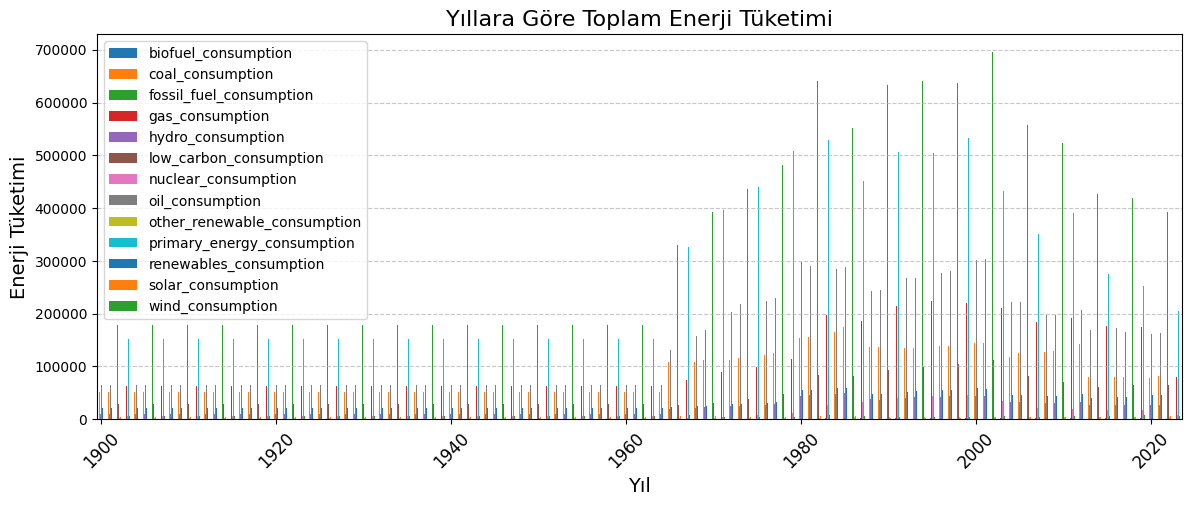

In [25]:
import matplotlib.pyplot as plt

# Yıllara göre enerji tüketim trendlerini hesaplama
energy_trends = df.groupby('year')[consumption_columns].sum()

# Bar grafiği oluşturma
energy_trends.plot(kind='bar', figsize=(14, 5))
plt.title('Yıllara Göre Toplam Enerji Tüketimi', fontsize=16)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Enerji Tüketimi', fontsize=14)

# X eksenindeki yılları 20 yıllık aralıklarla göstermek
plt.xticks(ticks=range(0, len(energy_trends.index), 20), 
           labels=energy_trends.index[::20], 
           rotation=45, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 3.1 Yıllara Göre Biyoyakıt Tüketiminin Toplam Enerji Tüketimine Oranı Grafiği Üzerine Yorumlar


Bu grafik, biyoyakıt tüketiminin toplam enerji tüketimi içindeki oranını yıllara göre göstermektedir. Grafik, biyoyakıtların toplam enerji tüketimindeki payının zaman içinde nasıl değiştiğini anlamamıza yardımcı olur.

<h5>Genel Eğilim</h5>

**Erken Dönem Sabit Oranlar:**

1900'lü yılların başlarından itibaren biyoyakıtın toplam enerji tüketimindeki oranı sabit ve düşük seviyelerde kalmaktadır. Bu dönemde biyoyakıt kullanımı sınırlı kalmış olabilir, çünkü diğer enerji kaynakları henüz yaygınlaşmamıştır.


**1940'lar ve Sonrası Anormal Artış:**

1940'lı yıllardan itibaren biyoyakıt oranında kısa bir artış gözlemlenmektedir, ancak bu artış kısa süreli olup geçicidir.
1970'li yıllarda ciddi bir zirveye ulaşan oran, biyoyakıt tüketiminde anormal bir artışı gösteriyor. Bu artışın sebebi, biyoyakıtların yaygın kullanımı, muhtemelen ekonomik veya çevresel sebeplerle olabilir.

**1980'lerde Düşüş:**

1980'ler itibarıyla biyoyakıtın toplam enerji tüketimindeki oranı hızlı bir şekilde düşüşe geçmiştir. Bu dönemde diğer enerji kaynakları, özellikle fosil yakıtlar, dünya genelinde daha fazla tercih edilmeye başlanmıştır.


**2000'ler ve Sonrasındaki Yükseliş:**

2000'li yıllarda biyoyakıt tüketiminin oranında tekrar bir artış görülmeye başlanmıştır. Bu artış, yenilenebilir enerjiye ve biyoyakıt kullanımına yönelik çevresel baskıların arttığı dönemde başlamış olabilir.
Grafikte görülen bu artış, biyoyakıtların daha sürdürülebilir bir alternatif olarak kabul edilmeye başladığının bir göstergesi olabilir.

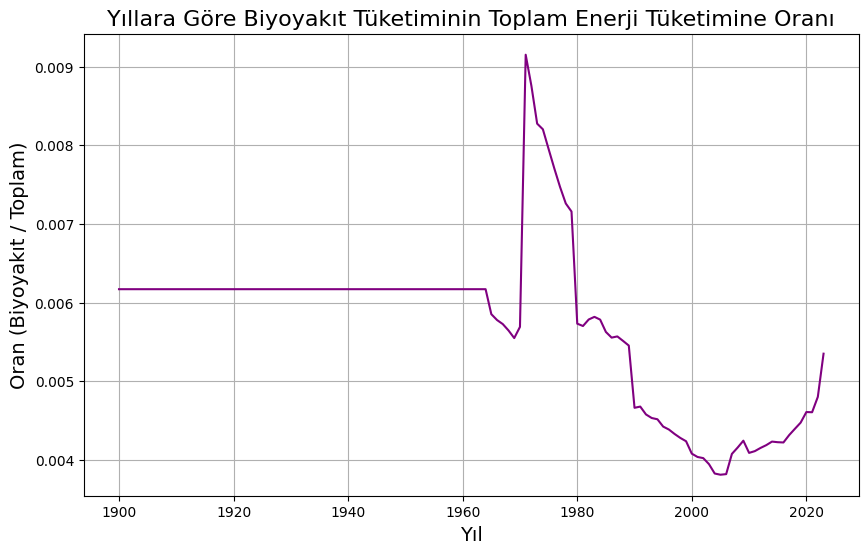

In [26]:
# Biyoyakıt ve toplam enerji tüketimi oranı
df['biofuel_ratio'] = df['biofuel_consumption'] / (df['biofuel_consumption'] + df['fossil_fuel_consumption'] + df['wind_consumption']+df['gas_consumption']+
df['coal_consumption']+df['hydro_consumption']+df['low_carbon_consumption']+df['nuclear_consumption']+df['oil_consumption']+df['oil_consumption']+df['solar_consumption'])

# Yıllara göre biyoyakıt oranı
biofuel_ratio_trend = df.groupby('year')['biofuel_ratio'].mean()

# Grafiği oluşturma
biofuel_ratio_trend.plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Yıllara Göre Biyoyakıt Tüketiminin Toplam Enerji Tüketimine Oranı', fontsize=16)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Oran (Biyoyakıt / Toplam)', fontsize=14)
plt.grid()
plt.show()


## 3.2 1900-2023 Arası Biyoyakıt Kullanımındaki Yıllık Değişim Yüzdesi (20'şer Yıl)


Bu grafik, 1900 ile 2023 yılları arasındaki biyoyakıt kullanımındaki yıllık değişim yüzdesini gösteren bir pasta grafiğidir.

**İlk Yıllarda Düşük Değişim Oranı:**

1900-1940 yılları arasındaki dilim, biyoyakıt kullanımında düşük bir yıllık değişim oranını göstermektedir. Bu dönemde biyoyakıtların kullanımındaki artış ve değişim çok sınırlıdır. Yüzde değişimi yaklaşık %6 seviyelerindedir.


**1960 ve 1970'lerde Değişim Artışı:**

1960-1980 yılları arasındaki dilimlerde biyoyakıt kullanımındaki yıllık değişim oranı %8 civarına yükselmiştir. Bu dönemde biyoyakıtların artan önemi ve enerji talebinin çeşitlenmesiyle birlikte biyoyakıt kullanımındaki artış hızlanmış olabilir

.
**1990'larda Stabilleşme ve 2000'lerde Hızlı Artış:**

1990-2010 yılları arasında biyoyakıt kullanımındaki yıllık değişim oranı %8.2 gibi sabit bir seviyeye oturmuştur. Ancak, 2010-2020 yılları arasında biyoyakıt kullanımındaki yıllık değişim oranı %18.6'ya çıkarak büyük bir artış göstermektedir. Bu artış, biyoyakıtların çevresel ve ekonomik faydalarına yönelik artan bilinç ve bu alandaki yatırımın etkisiyle açıklanabilir.


Biyoyakıtların artan kullanımının sebepleri arasında, 2000'li yıllarda üretim verimliliğini artıran teknolojik yenilikler, 2010'lu yıllarda çevresel kaygıların artmasıyla fosil yakıtların yerine sürdürülebilir alternatiflere yönelme isteği ve enerji tedarikinde bağımsızlık sağlama amacına yönelik biyoyakıt tercihinin artması yer almaktadır. Bu faktörler, biyoyakıt kullanımının hızla yükselmesine yol açmıştır.

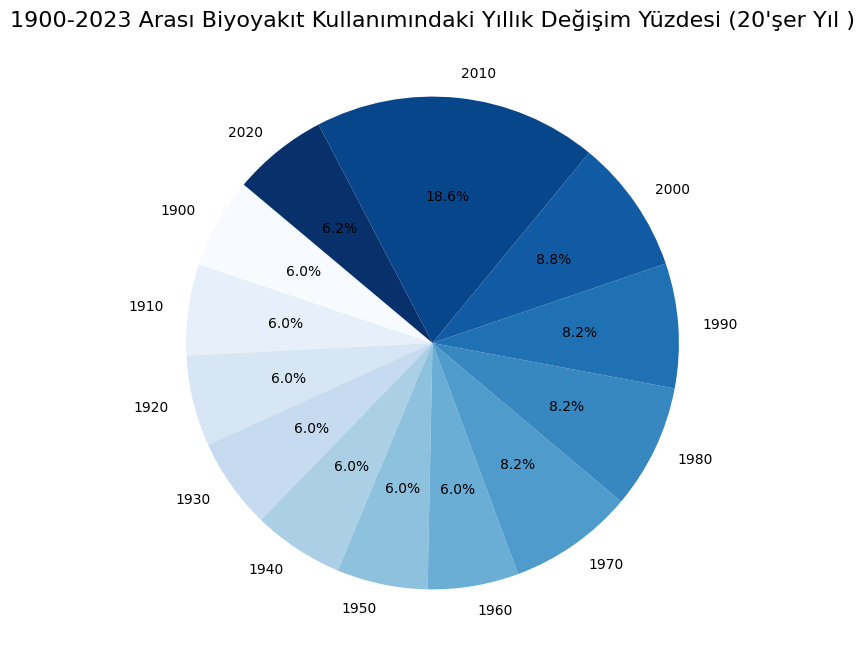

In [27]:


# Yıllık değişim yüzdesini hesaplama ve ilk 20 yılı seçme
biofuel_change_pct = df.groupby('year')['biofuel_cons_change_pct'].mean().dropna()

# Yıllık değişim yüzdesini 1900'den 2023'e kadar 20 yıllık aralıklarla seçme
years = np.arange(1900, 2024, 10)
biofuel_change_pct_selected = biofuel_change_pct.loc[years]

# Açık mavi -> orta kapalı mavi renk paleti oluşturma
colors = plt.cm.Blues(np.linspace(0, 1, len(biofuel_change_pct_selected)))

# Pie chart (yuvarlak grafik) oluşturma
plt.figure(figsize=(10, 8))
plt.pie(
    biofuel_change_pct_selected, 
    labels=biofuel_change_pct_selected.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
plt.title('1900-2023 Arası Biyoyakıt Kullanımındaki Yıllık Değişim Yüzdesi (20\'şer Yıl )', fontsize=16)
plt.show()


### 3.3 Yıllara Göre Kişi Başına Biyoyakıt Tüketimi

Bu grafikte, yıllara göre kişi başına düşen biyoyakıt tüketimi (TWh) gösterilmiştir. Grafiğin genel eğilimleri ve önemli noktaları şu şekilde yorumlanabilir:

**1900-1950 Dönemi:** Grafikte, kişi başına biyoyakıt tüketiminin uzun bir süre sabit kaldığı gözlemleniyor. Bu dönemde, biyoyakıtların kullanımında büyük bir değişiklik olmadığı ve enerji tüketiminde diğer kaynakların devreye girmediği anlaşılabilir.

**1950 Sonrası Düşüş:** 1950'lerden sonra biyoyakıt tüketiminde belirgin bir düşüş başlamış. Bu düşüş, fosil yakıtların ve endüstriyel enerji kaynaklarının hızlı bir şekilde yaygınlaşmasıyla ilişkilendirilebilir.

**1980'lerdeki Stabilizasyon:** 1980'lerde, kısa bir süreliğine biyoyakıt tüketiminde bir denge sağlanmış gibi görünüyor. Ancak bu stabilizasyon döneminden sonra tekrar düşüşe geçilmiş.

**2000'ler ve Sonrası:** 2000'li yıllardan itibaren biyoyakıt tüketiminde dikkat çekici bir artış gözlemleniyor. Bu artış, yenilenebilir enerjiye olan ilginin artması ve çevre dostu enerji kaynaklarına geçişle ilişkilendirilebilir.

**Genel Yorum:** Grafik, biyoyakıt tüketiminin zaman içindeki dalgalanmasını net bir şekilde gösteriyor. Tarihsel olarak biyoyakıt tüketimi azalmış olsa da, son yıllarda artış trendine geçtiği görülüyor. Bu, sürdürülebilir enerji politikalarının etkisiyle açıklanabilir.

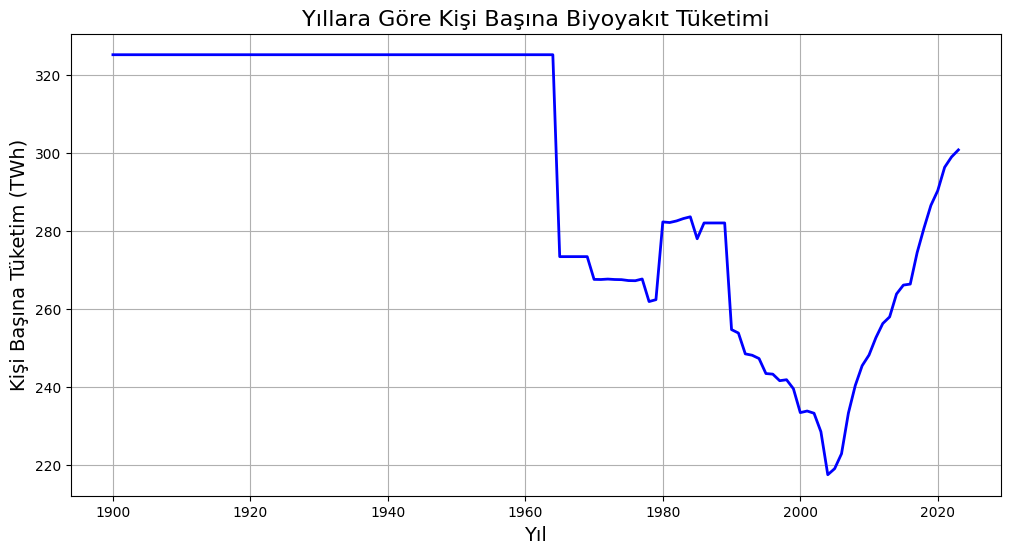

In [28]:
# Yıllara göre kişi başına biyoyakıt tüketimi
biofuel_per_capita = df.groupby('year')['biofuel_cons_per_capita'].mean()

# Grafiği oluşturma
biofuel_per_capita.plot(kind='line', figsize=(12, 6), color='blue', linewidth=2)
plt.title('Yıllara Göre Kişi Başına Biyoyakıt Tüketimi', fontsize=16)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Kişi Başına Tüketim (TWh)', fontsize=14)
plt.grid()
plt.show()


## 3.4 Yıllara Göre Elektrik Üretiminde Biyoyakıtın Payı (%)



Bu grafikte, yıllara göre elektrik üretiminde biyoyakıtın payı (%) incelenmektedir. 

**1900-1950:** Biyoyakıtın elektrik üretimindeki payı bu dönemde sabit bir şekilde yaklaşık %2.5 olarak kalmıştır. Bu, o dönemlerde biyoyakıtların enerji üretiminde temel kaynaklardan biri olduğunu göstermektedir.

**1950-2000:** 1950'lerden itibaren biyoyakıtın elektrik üretimindeki payında belirgin bir düşüş yaşanmıştır. Fosil yakıtların yaygınlaşması ve nükleer enerji gibi diğer kaynakların devreye girmesi bu azalmaya neden olmuştur. 1990'lı yıllarda biyoyakıtın payı en düşük seviyelere inmiştir.

**2000 Sonrası:** 2000'li yıllardan itibaren yenilenebilir enerji politikalarının etkisiyle biyoyakıtın elektrik üretimindeki payında yeniden bir artış görülmüştür. Çevre dostu enerjiye geçiş çabaları bu artışı desteklemiştir.

**Son Yıllar:** Grafik, biyoyakıtların elektrik üretimindeki payının son yıllarda tekrar yükselerek zirve seviyelere ulaştığını göstermektedir. Bu durum, sürdürülebilir enerjiye verilen önemin artışıyla ilişkilendirilebilir.

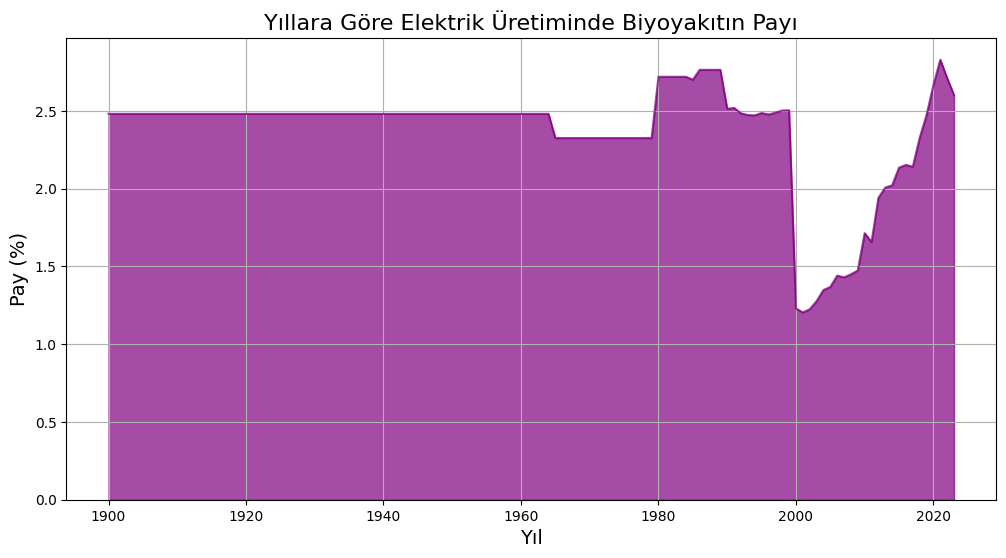

In [29]:
# Biyoyakıtın elektrik üretimindeki payı
biofuel_elec_share = df.groupby('year')['biofuel_share_elec'].mean()

# Grafiği oluşturma
biofuel_elec_share.plot(kind='area', figsize=(12, 6), color='purple', alpha=0.7)
plt.title('Yıllara Göre Elektrik Üretiminde Biyoyakıtın Payı', fontsize=16)
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Pay (%)', fontsize=14)
plt.grid()
plt.show()


## 3.5 En Çok Bioenerji Tüketen 20 Ülke

* Bu grafik, en çok bioenerji tüketen 20 ülkeyi toplam enerji üretimi değerlerine göre sıralayarak görselleştiriyor. Grafik, bioenerji tüketiminde farklı ülkelerin katkısını karşılaştırmaya yönelik net bir görünüm sunar.

* Madagascar'ı takip eden Eswatini ve Niger, diğer ülkelerden oldukça yüksek üretim değerlerine sahip. Bunun sebebi bu ülkelerdeki enerji kaynaklarının doğrudan bioenerjiye dayalı olması olabilir.

* ABD ve Fransa gibi gelişmiş ülkelerin listede yer alması, bioenerjinin sadece gelişmekte olan veya düşük gelirli ülkelerde değil, gelişmiş ülkelerde de önemli bir enerji kaynağı olduğunu gösteriyor.

  <h4>Doğal Kaynaklara ve Geleneksel Yöntemlere Bağımlılık:</h4>
  
Bioenerji, genellikle odun, tarımsal atıklar, hayvansal atıklar gibi yenilenebilir biyolojik kaynaklardan elde edilir. Bu tür enerji kaynakları, özellikle kırsal altyapıya sahip ülkelerde ve fosil yakıtlara sınırlı erişimi olan bölgelerde daha yaygın kullanılır.
**Madagaskar, Eswatini ve Nijer** gibi ülkeler, düşük teknolojik altyapı ve elektrik şebekesine erişim eksikliği nedeniyle geleneksel enerji üretim yöntemlerine (örneğin, odun ve kömür kullanımı) daha fazla bağımlıdır.


Bu üç ülkenin listenin en üstünde yer alması, hem ekonomik hem de altyapısal kısıtlamaların bir sonucu olarak değerlendirilebilir. Modern enerji kaynaklarının sınırlı olması ve bioenerji kaynaklarına olan kolay erişim, bu ülkeleri bioenerji tüketiminde ön sıralara taşımaktadır. Ayrıca bu durum, sürdürülebilir enerji politikalarının önemini ve bu ülkelerde enerji altyapısını geliştirme gerekliliğini de vurgulamaktadır.

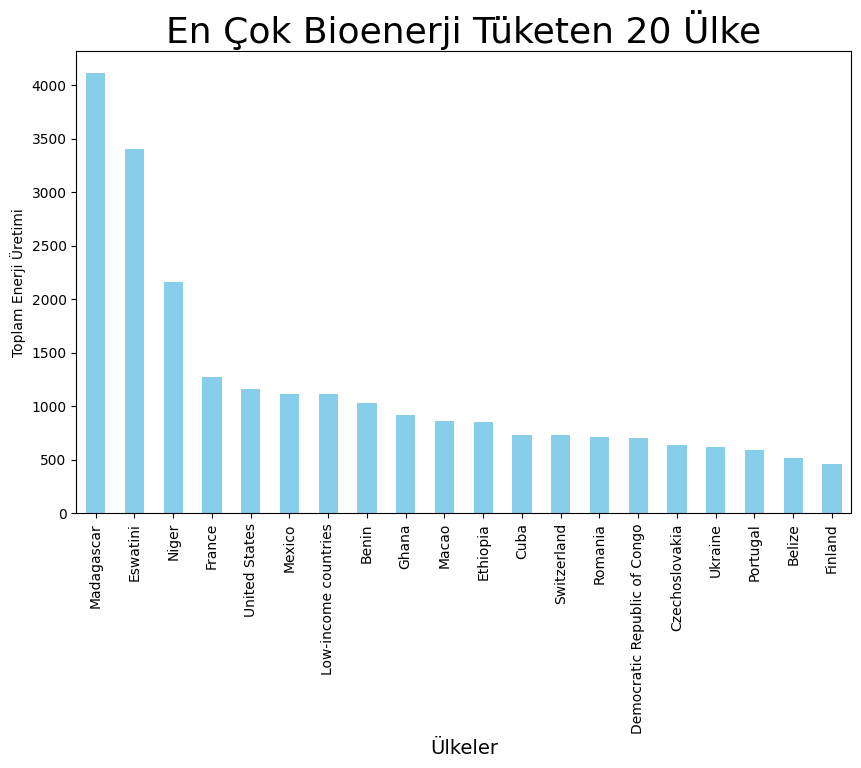

In [30]:
top_countries = df.groupby('country')['biofuel_share_elec'].sum().nlargest(20)
top_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('En Çok Bioenerji Tüketen 20 Ülke',fontsize=26)
plt.xlabel('Ülkeler',fontsize=14)
plt.ylabel('Toplam Enerji Üretimi')
plt.show()


## 3.6 Biofuel ile İlgili Sayısal Değişkenler Arası Korelasyon Matrisi


**<h5>**En güçlü pozitif kolasyon  </h5>**

 
   - **`biofuel_share_energy`** ile **`biofuel_cons_per_capita`** arasında yüksek bir korelasyon (\(r = 0.77\)) görülüyor. Bu, kişi başına biyoyakıt tüketimi arttıkça, biyoyakıtın toplam enerji tüketimindeki payının da arttığını gösterir.
   - **`biofuel_share_ele`** ile **`biofuel_elec_per_capita`** arasında (\(r = 0.65\)) pozitif korelasyon bulunuyor. Kişi başına biyoyakıt ile üretilen elektrik tüketimi arttıkça, elektrik üretiminde biyoyakıtın payı da artmaktadı

2. **Düşük korelasyon**:
   - **`biofuel_electricity`** değişkeninin çoğu diğer değişkenle korelasyonu düşüktür. Bu, elektrik üretiminde biyoyakıtın diğer değişkenlerle zayıf bir ilişki içinde olduğunu gösterir.
   - Örneğin, **`biofuel_electricity`** ile **`biofuel_share_energy`** arasındaki korelasyon sadece \(r = 0.28\) civarındır.

3. **Negatif korelasyon**:
   - **`other_renewables_share_elec_exc_biofuel`** değişkeni, özellikle biyoyakıtın elektrik üretimindeki payı ile (\(r = -0.09\)) zayıf bir negatif ilişkiye sahiptir. Bu, yenilenebilir enerji kaynaklarının biyoyakıta karşı alternatif olarak kullanımını ifade ebilir.

4. **Diğer yenilenebilir enerji etkisi**:
   - **`other_renewables_elec_per_capita_exc_biofuel`** ve **`biofuel_share_ele`** arasında \(r = -0.11\) gibi bir negatif korelasyon bulunmaktadır. Bu, biyoyakıt yerine diğer yenilenebilir enerji kaynaklarının tercih edilme durumunun bir göster
    ge**<h5>Genel Yorum:</h5>**

### Genel Yorum:
- Kişi başına tüketim ve enerji/electricity payı gibi değişkenler arasında güçlü ilişkiler varken, diğer yenilenebilir enerji kaynakları ile biyoyakıt kullanımı arasında genel olarak zayıf veya negatif ilişkiler bulunmaktadır. 
- Bu sonuçlar, biyoyakıt kullanımının enerji üretimindeki payı artırmada etkili olduğunu ancak diğer yenilenebilir kaynaklarla rekabet içinde olduğunu gösterebilir. 

Bu bilgiler, enerji politikalarının ve biyoyakıt kullanımının hangi alanlarda daha etkili olduğuna dair fikir verebilir. Daha fazla detay için, zaman içerisindeki değişimler veya ülkeler bazında analiz yapılabilir.

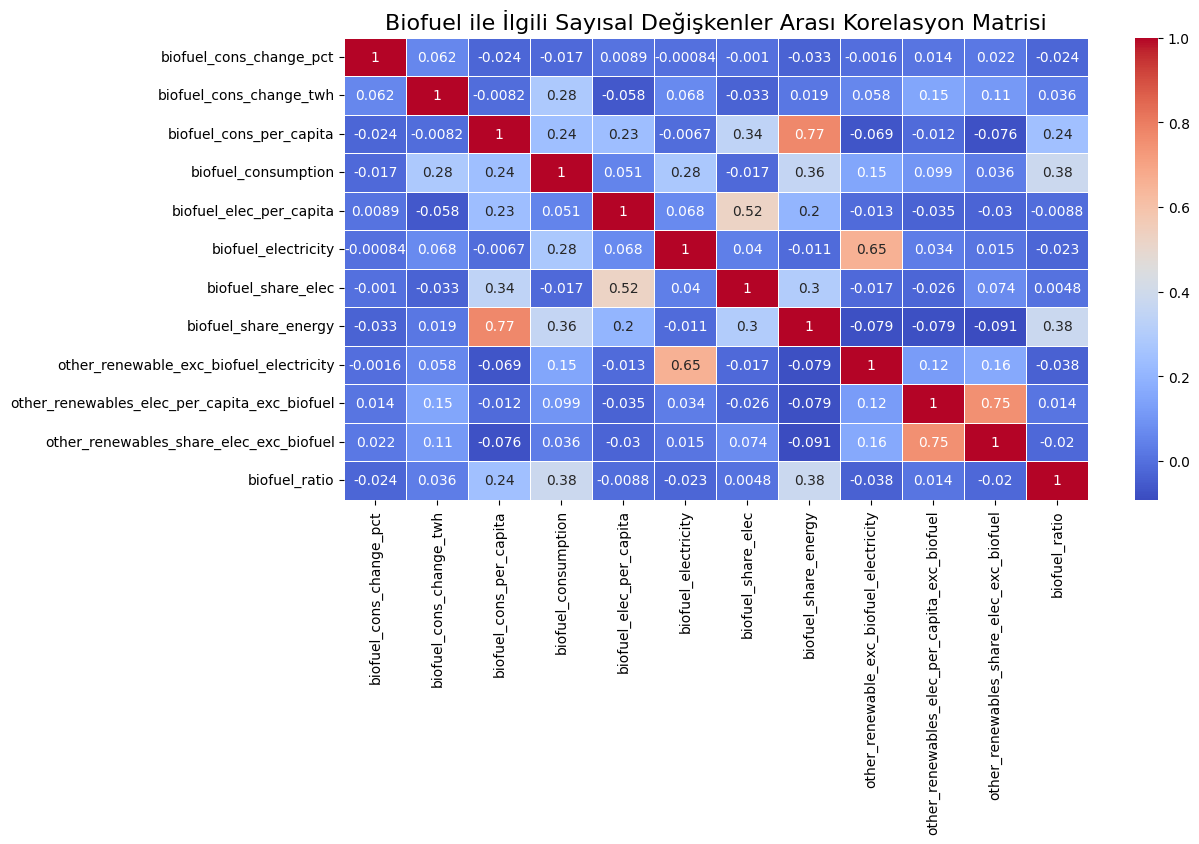

In [31]:
biofuel_columns = [col for col in df.columns if 'biofuel' in col.lower()]  # 'biofuel' kelimesini içeren sütunlar
df_biofuel = df[biofuel_columns]

df_biofuel_numeric = df_biofuel.select_dtypes(include=['float64', 'int64'])

correlation_matrix_biofuel = df_biofuel_numeric.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_biofuel, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Biofuel ile İlgili Sayısal Değişkenler Arası Korelasyon Matrisi', fontsize=16)
plt.show()


# 4-) Sonuç Analiz Raporu

<span style="font-size:18px;"> Proje Başlığı: Bioenerji Tüketimi ve Ülkeler Arası Karşılaştırma </span>

**Projenin Amacı:**
Bu proje, dünyada bioenerji tüketiminin ülkeler arasındaki dağılımını inceleyerek tüketim alışkanlıklarının ekonomik, sosyal ve çevresel nedenlerini anlamayı amaçlamaktadır. Veriler, en çok bioenerji tüketen 20 ülkenin toplam enerji üretimine katkılarını görselleştirmek için analiz edilmiştir.

**Proje Süreci ve Adımları:**


**Veri Hazırlığı ve Eksik Veri Yönetimi:**

Kaggle’dan temin edilen veri seti, bioenerji tüketimi ile ilgili eksik değerler açısından incelendi. Eksik veriler uygun yöntemlerle dolduruldu ve temiz bir analiz yapılması için gerekli düzenlemeler sağlandı.
Veriler doğrulandıktan sonra toplam enerji üretimi bazında sıralama yapılarak, en çok bioenerji tüketen 20 ülke belirlenip analiz edildi.

**Görselleştirme ve Dağılım Analizi:**

Bioenerji tüketiminde öne çıkan ülkeler bir çubuk grafik yardımıyla görselleştirildi. Toplam enerji üretimi, ülke isimleri üzerinden karşılaştırılarak görsel netlik sağlandı.
Özellikle Madagaskar, Eswatini ve Niger, diğer ülkelerden belirgin şekilde daha fazla enerji üretimiyle dikkat çekti. Orta sıralardaki ülkeler (örneğin, Mexico, Benin) ise nispeten daha dengeli tüketim değerlerine sahiptir.
**Kategorik Gruplama ve Çıkarımlar:**

"Düşük gelirli ülkeler" (Low-income countries) adıyla gruplandırılan ülkelerin toplam bioenerji üretimi de grafikte yer aldı. Bu, düşük gelir seviyesinin bioenerji kullanımında önemli bir belirleyici olduğunu ortaya koydu.

**Öne Çıkan Bulgular:**
**Madagaskar, Eswatini ve Niger’in Gibi Ülkelerin Üst Sıralarda Olmasının Anlamı:**

Bu ülkelerde, bioenerji kaynakları temel enerji kaynağı olarak kullanılıyor. Özellikle ekonomik altyapının sınırlı olduğu bölgelerde, geleneksel enerji kaynaklarına erişim düşük olduğundan bioenerji daha yaygın bir şekilde tercih ediliyor.
Madagaskar, toplam enerji üretiminde açık ara lider konumda olup, kırsal nüfusun enerji ihtiyaçlarını büyük ölçüde bioenerji ile karşılayan bir ülke.

**Orta ve Alt Sıralardaki Ülkeler:**

Mexico, Benin, Ghana, ve Ethiopia gibi ülkeler, hem coğrafi hem de ekonomik faktörler nedeniyle bioenerjiye erişimde dengeli bir tüketim eğilimi göstermektedir. Bu ülkelerde bioenerji tüketimi, genellikle tarımsal atıklardan ve biyokütleden enerji üretimiyle sağlanmaktadır.
İsviçre ve Fransa gibi gelişmiş ülkelerin varlığı, bioenerji tüketiminin sadece gelişmekte olan ülkelerle sınırlı olmadığını, sürdürülebilir enerji politikalarının bir parçası olarak gelişmiş ülkelerde de benimsendiğini ortaya koymaktadır.
Düşük Gelirli Ülkeler Grubu:

Bioenerji tüketiminde düşük gelirli ülkelerin yer alması, bu ülkelerde yenilenebilir ve ekonomik enerji kaynaklarına olan yüksek bağımlılığı vurgular. Ancak bu durum, altyapı yatırımlarının eksikliğini ve fosil yakıtlara erişimdeki sınırlamaları da işaret etmektedir.

**Sonuç ve Öneriler**

**Bioenerji Kullanımının Yaygınlığı:**


Bioenerji, düşük gelirli ve enerji altyapısı sınırlı ülkelerde temel enerji kaynağı olarak öne çıkıyor. Özellikle kırsal nüfusun yüksek olduğu ülkelerde, yemek pişirme, ısınma ve küçük ölçekli üretim için kullanılan en ekonomik yöntemdir.
Gelişmiş Ülkelerdeki Yeri:

Bioenerji, İsviçre ve Fransa gibi gelişmiş ülkelerde, çevresel kaygılarla tercih edilen sürdürülebilir enerji kaynaklarından biri olarak dikkat çekmektedir. Bu durum, gelişmiş ülkelerin bioenerjiyi fosil yakıtlara alternatif olarak stratejik şekilde benimsediğini göstermektedir.

**Politika ve Strateji Önerileri:**

**Enerji çeşitliliği ve altyapı geliştirme:** Madagaskar, Eswatini ve Niger gibi ülkelerde modern enerji altyapısına yatırım yapılması, bioenerjiye bağımlılığı azaltabilir.
Sürdürülebilir enerji projeleri: Bioenerji kaynaklarının yenilenebilir enerji yatırımları ile birlikte daha verimli kullanılması teşvik edilmelidir.

**Eğitim ve Farkındalık:** Bioenerji tüketiminin çevresel etkilerini azaltmak için yerel halk arasında enerji verimliliği ve sürdürülebilirlik konusunda farkındalık artırılabilir.
Sonuç olarak, bioenerji tüketimi, ekonomik kalkınma ve enerjiye erişim arasındaki ilişkileri anlamak için önemli bir gösterge olarak değerlendirilmelidir. Bu analiz, ülkeler arasındaki farklılıkları anlamak ve sürdürülebilir enerji politikaları geliştirmek için sağlam bir temel oluşturabilir.